## MNIST data sets 
url:http://yann.lecun.com/exdb/mnist/

Q1:如何加载数据集,显示数据集的及大小，理解编码方式(One-hot)
Q2:如何显示图像
Q3:如何利用keras搭建并训练


In [6]:
###load dataset
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

mnist=input_data.read_data_sets("./MNIST_data",one_hot=True)
? dir()#####dir 是一个内置函数，用于列出对象的所有属性及方法

Extracting ./MNIST_data\train-images-idx3-ubyte.gz
Extracting ./MNIST_data\train-labels-idx1-ubyte.gz
Extracting ./MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data\t10k-labels-idx1-ubyte.gz


In [12]:
class Dog():
    def __init__(self,name,age):
        self.name=name
        self.age=age
    
    def sit(self):
        print(self.name,"is sitting on the ground")
        
    def roll_over(self):
        print(self.name,"rolled over")

1. 类中的函数称为方法
2. __init__(前后2个下划线）是一个特殊的方法，每次根据Dog类创建新的实例时，Python自动运行它。
3. __init__有3个形参，self,name,age。python调用__init__创建Dog实例时，自动传入self.每个与类相关联的
方法的调用都自动传递实参self.它指向实例本身，让实例访问类的属性和方法

In [13]:
my_dog=Dog("WangWang",3)
print(my_dog.name,"is",my_dog.age,"years old")

WangWang is 3 years old


In [14]:
my_dog.sit()

WangWang is sitting on the ground


In [15]:
my_dog.roll_over()

WangWang rolled over


In [18]:
dir(my_dog)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'age',
 'name',
 'roll_over',
 'sit']

In [19]:
dir(Dog)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'roll_over',
 'sit']

In [49]:
train_X,train_Y,test_X,test_Y=mnist.train.images,mnist.train.labels,\
mnist.test.images,mnist.test.labels

In [21]:
print(train_X.shape,train_Y.shape,test_X.shape,test_Y.shape)

(55000, 784) (55000, 10) (10000, 784) (55000, 10)


1. 784和10表示什么意思？$784=28^2$。10表示10位one_hot(独热)编码方式。如1可表示为[0 1 0 0 0 0 0 0 0 0],9表为 [0 0 0 0 0 0 0 0 0 1]

2. 为什么用独热编码？

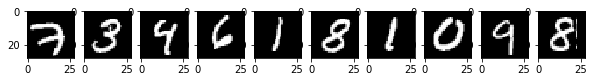

In [45]:
###data visualization
import matplotlib.pyplot as plt
fig,axis=plt.subplots(1,10,figsize=(10,7))
for i in range(10):
    img=np.reshape(train_X[i,:],(28,28))
    axis[i].imshow(img,cmap='gray')

In [46]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import SGD
model=Sequential()
model.add(Dense(input_dim=28*28,output_dim=256,activation='relu'))
model.add(Dense(input_dim=256,output_dim=10,activation='softmax'))
model.compile(optimizer=SGD(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


e:\python\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=256)`
  """
e:\python\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=256, activation="softmax", units=10)`
  


In [47]:
model.fit(train_X,train_Y,batch_size=256,epochs=100,verbose=1)

Epoch 1/100
55000/55000 [==============================] - 2s 39us/step - loss: 1.5844 - acc: 0.6094
Epoch 2/100
55000/55000 [==============================] - 2s 30us/step - loss: 0.8420 - acc: 0.8241
Epoch 3/100
55000/55000 [==============================] - 2s 30us/step - loss: 0.6247 - acc: 0.8541
Epoch 4/100
55000/55000 [==============================] - 2s 31us/step - loss: 0.5286 - acc: 0.8688
Epoch 5/100
55000/55000 [==============================] - 2s 30us/step - loss: 0.4738 - acc: 0.8781
Epoch 6/100
55000/55000 [==============================] - 2s 33us/step - loss: 0.4376 - acc: 0.8849
Epoch 7/100
55000/55000 [==============================] - 2s 34us/step - loss: 0.4116 - acc: 0.8903
Epoch 8/100
55000/55000 [==============================] - 2s 34us/step - loss: 0.3918 - acc: 0.8937
Epoch 9/100
55000/55000 [==============================] - 2s 37us/step - loss: 0.3762 - acc: 0.8969
Epoch 10/100
55000/55000 [==============================] - 2s 35us/step - loss: 0.3630 - a

55000/55000 [==============================] - 2s 36us/step - loss: 0.1585 - acc: 0.9560
Epoch 81/100
55000/55000 [==============================] - 2s 35us/step - loss: 0.1573 - acc: 0.9565
Epoch 82/100
55000/55000 [==============================] - 2s 35us/step - loss: 0.1562 - acc: 0.9565
Epoch 83/100
55000/55000 [==============================] - 2s 40us/step - loss: 0.1550 - acc: 0.9568
Epoch 84/100
55000/55000 [==============================] - 2s 38us/step - loss: 0.1539 - acc: 0.9572
Epoch 85/100
55000/55000 [==============================] - 3s 50us/step - loss: 0.1528 - acc: 0.9573
Epoch 86/100
55000/55000 [==============================] - 2s 41us/step - loss: 0.1517 - acc: 0.9581
Epoch 87/100
55000/55000 [==============================] - 2s 41us/step - loss: 0.1506 - acc: 0.9583
Epoch 88/100
55000/55000 [==============================] - 2s 36us/step - loss: 0.1496 - acc: 0.9585
Epoch 89/100
55000/55000 [==============================] - 2s 36us/step - loss: 0.1485 - acc: 

#### 获得程序运行时间
import time

start_time=time.time()

###程序段#####
###程序段#####

end_time=time.time()

print(end_time-start_time)

In [54]:
evaluation=model.evaluate(test_X,test_Y,batch_size=256,verbose=1)
print("test loss:%.4f"%(evaluation[0]),"test accuracy:%.4f"%(evaluation[1]))

10000/10000 [==============================] - 0s 20us/step
test loss:0.1436 test accuracy:0.9591


In [56]:
import time
start_time=time.time()
my_model.fit(train_X,train_Y,batch_size=256,epochs=100,verbose=1)
end_time=time.time()
print(end_time-start_time)

Epoch 1/100
55000/55000 [==============================] - 4s 78us/step - loss: 1.6137 - acc: 0.6193
Epoch 2/100
55000/55000 [==============================] - 4s 80us/step - loss: 0.7413 - acc: 0.8425
Epoch 3/100
55000/55000 [==============================] - 4s 81us/step - loss: 0.5135 - acc: 0.8746
Epoch 4/100
55000/55000 [==============================] - 4s 80us/step - loss: 0.4301 - acc: 0.8870
Epoch 5/100
55000/55000 [==============================] - 5s 83us/step - loss: 0.3860 - acc: 0.8959
Epoch 6/100
55000/55000 [==============================] - 5s 89us/step - loss: 0.3576 - acc: 0.9012
Epoch 7/100
55000/55000 [==============================] - 5s 91us/step - loss: 0.3370 - acc: 0.9062
Epoch 8/100
55000/55000 [==============================] - 5s 89us/step - loss: 0.3209 - acc: 0.9099
Epoch 9/100
55000/55000 [==============================] - 5s 85us/step - loss: 0.3075 - acc: 0.9130
Epoch 10/100
55000/55000 [==============================] - 6s 104us/step - loss: 0.2960 - 

55000/55000 [==============================] - 5s 83us/step - loss: 0.0907 - acc: 0.9752
Epoch 81/100
55000/55000 [==============================] - 5s 94us/step - loss: 0.0897 - acc: 0.9756
Epoch 82/100
55000/55000 [==============================] - 5s 94us/step - loss: 0.0887 - acc: 0.9758
Epoch 83/100
55000/55000 [==============================] - 5s 96us/step - loss: 0.0877 - acc: 0.9759
Epoch 84/100
55000/55000 [==============================] - 5s 84us/step - loss: 0.0867 - acc: 0.9764
Epoch 85/100
55000/55000 [==============================] - 4s 80us/step - loss: 0.0857 - acc: 0.9765
Epoch 86/100
55000/55000 [==============================] - 5s 83us/step - loss: 0.0847 - acc: 0.9769
Epoch 87/100
55000/55000 [==============================] - 5s 83us/step - loss: 0.0838 - acc: 0.9774
Epoch 88/100
55000/55000 [==============================] - 5s 82us/step - loss: 0.0829 - acc: 0.9773
Epoch 89/100
55000/55000 [==============================] - 4s 81us/step - loss: 0.0820 - acc: 

In [59]:
print("trainning time:%.2f"%(end_time-start_time),'second(s)')

trainning time:451.42 second(s)


In [60]:
evaluation=my_model.evaluate(test_X,test_Y,batch_size=256,verbose=1)
print("my_model test loss:%.4f"%(evaluation[0]),"corresponding test accuracy:%.4f"%(evaluation[1]))

10000/10000 [==============================] - 0s 33us/step
my_model test loss:0.0946 corresponding test accuracy:0.9708


#### 由此可见增加网络的层数可以提高模型的准确率！如果引入许多层(>6)的网络那么准确率可以很高，但是也会出现过拟合(Overfitting)